# TITANIC SURIVAL PREDICTION
## Data set:
In the early hours of April 15, 1912, the RMS Titanic, a luxurious ocean liner hailed as "unsinkable," met a tragic fate in the icy waters of the North Atlantic. On its maiden voyage from Southampton to New York City, the ship collided with an iceberg, tearing open its hull and sealing the fate of over 1,500 passengers and crew.

Despite being equipped with advanced safety features, including watertight compartments and wireless telegraphy, the Titanic's catastrophic sinking shocked the world and sparked sweeping reforms in maritime safety standards. This iconic disaster serves as a stark reminder of the frailty of human endeavors in the face of nature's unyielding force.

#### Data Set Source : https://www.kaggle.com/datasets/yasserh/titanic-dataset

## Study's goal : 
    Determine if a passenger survived the horrible disaster or not based on feature like: Age, Genre, Social status...

## Document structure:
1. Data collection
2. Data preprocessing/visualisation
3. Modele construction and implemention 
4. Evaluation of the modele and optimisation
    
    

# 1. Data Collection
To handle the data set, we tend to use two famous libraries: 

    Pandas: A powerful Python library for data manipulation and analysis, offering data structures like DataFrame for easy handling of structured data.

    NumPy: The fundamental package for numerical computing in Python, providing support for large, multi+dimensional arrays and matrices, along with a wide range of mathematical functions.
    
    Matplotlib.pyplot: A module within the Matplotlib library that provides a MATLAB+like interface for creating static, interactive, and publication+quality visualizations in Python, facilitating the creation of plots, charts, histograms, and more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### showcase the version of the libraries imported


In [2]:
print('Pandas version: ',pd.__version__)
print('NumPy version: ',np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Pandas version:  2.0.3
NumPy version:  1.24.3
Seaborn version: 0.12.2
Matplotlib version:  3.7.2


### Different methods of importing data using pandas library:
    1. pandas.read_csv() ; to read .csv type files.
    2. pandas.read_json() ; to read Jason type files.
    3. pandas.read_excel() ; to read .xls/Excel speadcheet type of files.
    4. pandas.read_html() ; to read html type of documents and files

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
pd.set_option('display.max_rows', 100)  # The maximum number of rows/entries allowed to display for each function.
pd.set_option('display.max_columns', 100)  # The maximum number of features/columns to display for each function.

    The function pd.read_csv() makes it possible to import and convert type from .csv file into a instances of class <dataframe>
    
    Pandas DataFrame: In a Nutshell

        Core structure for data in Pandas.

        Think spreadsheet: rows & columns with labels.

        Holds various data types: numbers, text, etc.

        Efficient data manipulation & analysis.

        Foundation for data science workflows.  

# 2. Data preprocessing

## 2.1 Description of the data set and brief explanation of the features:
In this step, I'll try to explain the different dimensions and aspect of the dataset, including the different columns, number of entries, search for null values and much more.
    

### 2.1.1 Categorisation of dataset's variables:

The titanic dataset gives you information about multiple people like their ages, sexes, sibling counts, embarkment points and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking.
Generally, we can divide the data into two main categories:
 + Qualitative (Categorical): Describe qualities or categories with no inherent order (e.g., hair color, blood type).
    - Nominal: Distinct categories with no order (e.g., brand preference).
    - Ordinal: Ordered categories but with unequal differences (e.g., customer satisfaction rating).
 + Quantitative (Numerical): Represent numerical quantities with inherent meaning (e.g., height, weight).
    - Discrete: Countable values with intervals between them (e.g., number of siblings).
    - Continuous: A spectrum of possible values (e.g., temperature, income).

Knowing the variable type is crucial for choosing appropriate statistical methods and interpreting results accurately.

### 2.1.2 Dataset sample :

In [4]:
df.head() # df.head(n : int = nbr ) method allows us to get the first `nbr` rows of the dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail() # Contrary to the df.head() function, this function returns the last n rows of the dataframe.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2.1.3 Dataset Feature types and description: 

**Numerical (Discrete):**

* PassengerId: A unique identifier assigned to each passenger.
* Survived: Indicates whether the passenger survived (1) or not (0).
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class) 
* SibSp: The number of siblings or spouses traveling with the passenger.
* Parch: The number of parents or children traveling with the passenger.

**Numerical (Continuous):**

* Age: The passenger's age in years at the time of travel.
* Fare : Represents the ticket price for each passenger

**Categorical (Nominal):**

* Name: The passenger's full name.
* Sex: The passenger's gender.
* Ticket: The unique ticket number.
* Cabin: The cabin number or category assigned to the passenger.
* Embarked: The port where the passenger boarded the ship. 


## 2.2 - Preprocessing

### 2.2.1 Structure and data integrity

Before we continue we this study, we must make sure that we 'prepare' our data for visualisation and for testing.
One of these steps, is to verify the total number of rows and the existant of any null/non existing values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we notice that the features `Age` contains only 714 entries, which means there're a lot of missing value. 

Same for the `Cabin` and `Embarked` features.

To count how many values are missing, we can use the method `df.isnull().sum()`

### 2.2.2 Missing values

In [7]:
print('Feature \t Missing')
print('+------------+-----------+')
df.isnull().sum() # To check for missing value

Feature 	 Missing
+------------+-----------+


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isna().sum() # to check for 'not a number' type 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
print(df['Age'].isnull().sum(), 'missing values')

177 missing values


In [10]:
print(df['Cabin'].isnull().sum(), 'missing values')

687 missing values


In [11]:
print(df['Embarked'].isnull().sum(), 'missing values')

2 missing values


To deal with missing values: we can chose either to delete the rows or fill them with some calculated values like the mean, the median, the mode...

    For the 'Age' feature, let's calculate and fill the missing values with the median of the distribution

In [12]:
age_median = df['Age'].median() ; print('The median of the "age" features is : ', age_median)

The median of the "age" features is :  28.0


In [13]:
# Filling the values using the age_median value:
print('Before filling the missing values : ', df["Age"].isna().sum(), 'Missing')
df.fillna({'Age': age_median }, inplace=True)
print('After filling the missing values : ', df["Age"].isna().sum(), 'Missing')



Before filling the missing values :  177 Missing
After filling the missing values :  0 Missing


    For the 'Cabin' feature, we opt to delete that entire feature because the number missing values are is significant and may influence badly the model outcome.

In [14]:
del df['Cabin']

                                            After deleting 'Cabin' column

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


    For the 'Embarked' column, we can use the mode (The most frequent value) to fill in the missing values,

In [16]:
Embarked_mode = df['Embarked'].mode()
df.fillna({'Embarked': Embarked_mode[0]}, inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we notice that we have no missing values in our dataset, what remains is to check for duplicate and bad formatted entries.

### 2.2.3 Duplicated values : 

In [17]:
# Calculate the number of duplicated values for each feature
duplicated_counts = df.apply(lambda x: x.duplicated().sum())
print(duplicated_counts)

PassengerId      0
Survived       889
Pclass         888
Name             0
Sex            889
Age            803
SibSp          884
Parch          884
Ticket         210
Fare           643
Embarked       888
dtype: int64


We notice that some features in our dataset contains duplicated values but that doesn't raise an issue at all some pieces of informations can be repeated across rows for each individuals feature, like 'Survived' ( 0 or 1 ), 'Sex' ( Male or Female ) and so on..

What matters is that features like 'PassengerId' and 'Name' contains no duplicate, which means that every row represent a unique passenger.

### 2.2.4 Transforming Qualitative variables into Quantitative :

In [18]:
df['Sex'].replace({'male' : 1, 'female' : 0}, inplace = True) # Transforming the feature 'Sex'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [19]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3}) # Transforming the feature 'Embarked'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1


### 2.2.5 Deleting unecessary columns:

In [20]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace = False)

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,28.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


### 2.2.6 Simple Aggregations ( Statistics )

The `describe()` method provides a statistical summary for each column in a DataFrame. It's important to note that the descriptive statistics returned by the `describe()` method depend on the data type of a column. For non-numeric columns, the descriptive statistics returned by the method are as follows:
| Name      | Description                               |
|-----------|-------------------------------------------|
| `count`   | Number of non-missing values              |
| `unique`  | Number of unique non-missing values       |
| `top`     | Most frequent value                       |
| `freq`    | Frequency of the most frequent value      |



Let's take for example the Survived feature into account : 

In [22]:
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

We notice that there are two main calculated values which may seem meaningful: The mean and the standard deviation.

In statistical calculations, the mean represents the average value of a dataset, indicating the central tendency of the data. 

The standard deviation measures the dispersion or variability of the data points around the mean. It provides information about the spread of the data and helps assess the degree of variability within the dataset.

For example, we observe a mean survival rate of 0.383 and a standard deviation of 0.486, which suggests that, on average, approximately 38.3% of passengers survived, with a variability or spread of approximately 48.6% around this average survival rate.

#### Passenger Class (Pclass) Analysis

In [23]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

- **Mean**: The average passenger class is approximately 2.31, indicating that most passengers are between class 2 and class 3.
- **Standard Deviation (std)**: With a std of approximately 0.84, there is some variability in passenger classes around the mean.
- **Quartiles**: 
  - 25th percentile (Q1): 25% of passengers were in class 1 or lower.
  - 50th percentile (Q2): 50% of passengers were in class 2 or lower (median).
  - 75th percentile (Q3): 75% of passengers were in class 3 or lower.


### Gender of passengers Analysis

In [24]:
df['Sex'].describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

- **Mean**: Approximately 64.76% of passengers are male (mean value of 0.647587 after transformation).
- **Standard Deviation (std)**: The std is approximately 0.478, indicating some variability in gender distribution.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers are female (0).
  - 50th percentile (Q2): Median, with 50% of passengers being male (1).
  - 75th percentile (Q3): 75% of passengers are male (1).

#### Passenger Age Analysis

In [25]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

- **Mean**: The average age of passengers is approximately 29.36 years.
- **Standard Deviation (std)**: The standard deviation is approximately 13.02 years, indicating variability in ages among passengers.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers are aged 22 years or younger.
  - 50th percentile (Q2): Median age, with 50% of passengers aged 28 years or younger.
  - 75th percentile (Q3): 75% of passengers are aged 35 years or younger.
- **Min**: The youngest passenger aboard the Titanic was approximately 0.42 years old (about 5 months).
- **Max**: The oldest passenger aboard the Titanic was 80 years old.

#### SibSp Analysis (The number of siblings or spouses traveling with the passenger) : 

In [26]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

- **Mean**: The average number of siblings/spouses aboard the Titanic is approximately 0.52.
- **Standard Deviation (std)**: The standard deviation is approximately 1.10, indicating variability in the number of siblings/spouses among passengers.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers had no siblings/spouses aboard.
  - 50th percentile (Q2): Median, with 50% of passengers having no siblings/spouses aboard.
  - 75th percentile (Q3): 75% of passengers had 1 or fewer siblings/spouses aboard.
- **Min**: The minimum value indicates that some passengers had no siblings/spouses aboard.
- **Max**: The maximum value of 8 indicates that some passengers had up to 8 siblings/spouses aboard.


#### Parch Analysis (The number of parents or children traveling with the passenger) 

In [27]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

- **Mean**: The average number of parents/children aboard the Titanic is approximately 0.38.
- **Standard Deviation (std)**: The standard deviation is approximately 0.81, indicating variability in the number of parents/children among passengers.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers had no parents/children aboard.
  - 50th percentile (Q2): Median, with 50% of passengers having no parents/children aboard.
  - 75th percentile (Q3): 75% of passengers had no parents/children aboard.
- **Min**: The minimum value indicates that some passengers had no parents/children aboard.
- **Max**: The maximum value of 6 indicates that some passengers had up to 6 parents/children aboard.


#### Fare analysis : 

In [28]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- **Mean**: The average fare paid by passengers is approximately \$32.20, indicating the typical cost of tickets aboard the Titanic.
- **Standard Deviation (std)**: The standard deviation is approximately \$49.69, signifying variability in ticket prices among passengers.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers paid less than or equal to \$7.91, representing lower-priced tickets.
  - 50th percentile (Q2): Median fare, with 50% of passengers paying less than or equal to \$14.45.
  - 75th percentile (Q3): 75% of passengers paid less than or equal to \$31.00, indicating higher-priced tickets.
- **Min**: The minimum fare paid was \$0.00, possibly indicating complimentary or discounted tickets.
- **Max**: The maximum fare paid was \$512.33, reflecting premium-priced tickets for luxurious accommodations.


#### <i>Embarked</i> Feature Analysis

In [29]:
df['Embarked'].describe()

count    891.000000
mean       1.361392
std        0.635673
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Embarked, dtype: float64

- **Mean**: The average port of embarkation is approximately 1.36 <=> 'S', indicating Southampton.
- **Standard Deviation (std)**: The standard deviation is approximately 0.64, suggesting some variability in the encoded port values.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers embarked from Southampton ('S').
  - 50th percentile (Q2): Median, with 50% of passengers embarking from Southampton ('S').
  - 75th percentile (Q3): 75% of passengers embarked from either Southampton ('S') or Cherbourg ('C').


#### Survival by age:

In [30]:
survived_age = df.groupby('Survived')[['Age']] # Divided the distribution

survived_age.describe() # To calculate some statistics

Age                                                    
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
1         342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0

##### For passengers who did not survive (Survived = 0):
- **Count**: 549 non-missing values
- **Mean**: Approximately 30.03 years
- **Standard Deviation (std)**: Approximately 12.50
- **Min**: 1.00 year ; Which mean infantes and newly born babies were among the unfortunate ones
- **Quartiles**:
  - 25th percentile (Q1): 23 years or younger
  - 50th percentile (Q2, Median): 28 years or younger
  - 75th percentile (Q3): 35 years or younger
- **Max**: 74.0 years

##### For passengers who survived (Survived = 1):
- **Count**: 342 non-missing values
- **Mean**: Approximately 28.29 years
- **Standard Deviation (std)**: Approximately 13.76
- **Min**: 0.42 years
- **Quartiles**:
  - 25th percentile (Q1): 21 years or younger
  - 50th percentile (Q2, Median): 28 years or younger
  - 75th percentile (Q3): 35 years or younger
- **Max**: 80.0 years


#### Survival in relation to the Passenger social class

In [31]:
survived_pclass = df.groupby('Survived')[['Pclass']]
survived_pclass.describe()

Pclass                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0

##### For passengers who did not survive (Survived = 0):
- **Count**: There are 549 non-missing values.
- **Mean**: The average socio-economic class of passengers who did not survive is approximately 2.53, indicating that on average, they belonged to the middle to lower classes.
- **Standard Deviation (std)**: The standard deviation is approximately 0.74, suggesting some variability in socio-economic class among passengers who did not survive.
- **Min**: The minimum socio-economic class of passengers who did not survive is 1.0, indicating the presence of upper-class passengers among those who perished.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who did not survive belonged to the middle class or lower.
  - 50th percentile (Q2, Median): Median socio-economic class, with 50% of passengers who did not survive belonging to the lower class.
  - 75th percentile (Q3): 75% of passengers who did not survive belonged to the lower class.
- **Max**: The maximum socio-economic class of passengers who did not survive is 3.0, indicating lower-class passengers.

##### For passengers who survived (Survived = 1):
- **Count**: There are 342 non-missing values.
- **Mean**: The average socio-economic class of passengers who survived is approximately 1.95, indicating that on average, they belonged to the upper to middle classes.
- **Standard Deviation (std)**: The standard deviation is approximately 0.86, suggesting some variability in socio-economic class among passengers who survived.
- **Min**: The minimum socio-economic class of passengers who survived is 1.0, indicating the presence of upper-class passengers among survivors.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who survived belonged to the upper class or higher.
  - 50th percentile (Q2, Median): Median socio-economic class, with 50% of passengers who survived belonging to the middle class.
  - 75th percentile (Q3): 75% of passengers who survived belonged to the middle class.
- **Max**: The maximum socio-economic class of passengers who survived is 3.0, indicating middle-class passengers.


#### Survival and SibSp 

In [32]:
survived_SibSp = df.groupby('Survived')[['SibSp']]
survived_SibSp.describe()

SibSp                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0

##### For passengers who did not survive (Survived = 0):
- **Count**: There are 549 non-missing values.
- **Mean**: The average number of siblings/spouses aboard for passengers who did not survive is approximately 0.55, indicating that, on average, they had less than one sibling/spouse aboard.
- **Standard Deviation (std)**: The standard deviation is approximately 1.29, suggesting variability in the number of siblings/spouses among passengers who did not survive.
- **Min**: The minimum number of siblings/spouses aboard for passengers who did not survive is 0.0, indicating some passengers traveled alone.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who did not survive had no siblings/spouses aboard.
  - 50th percentile (Q2, Median): Median number of siblings/spouses aboard, with 50% of passengers who did not survive having none.
  - 75th percentile (Q3): 75% of passengers who did not survive had one sibling/spouse aboard.
- **Max**: The maximum number of siblings/spouses aboard for passengers who did not survive is 8.0.

##### For passengers who survived (Survived = 1):
- **Count**: There are 342 non-missing values.
- **Mean**: The average number of siblings/spouses aboard for passengers who survived is approximately 0.47, indicating that, on average, they had less than one sibling/spouse aboard.
- **Standard Deviation (std)**: The standard deviation is approximately 0.71, suggesting variability in the number of siblings/spouses among passengers who survived.
- **Min**: The minimum number of siblings/spouses aboard for passengers who survived is 0.0, indicating some passengers traveled alone.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who survived had no siblings/spouses aboard.
  - 50th percentile (Q2, Median): Median number of siblings/spouses aboard, with 50% of passengers who survived having none.
  - 75th percentile (Q3): 75% of passengers who survived had one sibling/spouse aboard.
- **Max**: The maximum number of siblings/spouses aboard for passengers who survived is 4.0.


### Survived and Parch

In [33]:
survived_parch = df.groupby('Survived')[['Parch']]
survived_parch.describe()

Parch                                             
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0

##### For passengers who did not survive (Survived = 0):
- **Count**: There are 549 non-missing values.
- **Mean**: The average number of parents/children aboard for passengers who did not survive is approximately 0.33, indicating that, on average, they had less than one parent/child aboard.
- **Standard Deviation (std)**: The standard deviation is approximately 0.82, suggesting variability in the number of parents/children among passengers who did not survive.
- **Min**: The minimum number of parents/children aboard for passengers who did not survive is 0.0, indicating some passengers traveled alone.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who did not survive had no parents/children aboard.
  - 50th percentile (Q2, Median): Median number of parents/children aboard, with 50% of passengers who did not survive having none.
  - 75th percentile (Q3): 75% of passengers who did not survive had no parents/children aboard.
- **Max**: The maximum number of parents/children aboard for passengers who did not survive is 6.0.

##### For passengers who survived (Survived = 1):
- **Count**: There are 342 non-missing values.
- **Mean**: The average number of parents/children aboard for passengers who survived is approximately 0.46, indicating that, on average, they had less than one parent/child aboard.
- **Standard Deviation (std)**: The standard deviation is approximately 0.77, suggesting variability in the number of parents/children among passengers who survived.
- **Min**: The minimum number of parents/children aboard for passengers who survived is 0.0, indicating some passengers traveled alone.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who survived had no parents/children aboard.
  - 50th percentile (Q2, Median): Median number of parents/children aboard, with 50% of passengers who survived having none.
  - 75th percentile (Q3): 75% of passengers who survived had one parent/child aboard.
- **Max**: The maximum number of parents/children aboard for passengers who survived is 5.0.


### Survival and Embarked 

In [34]:
survived_embarked = df.groupby('Survived')[['Embarked']]
survived_embarked.describe()

Embarked                                             
            count      mean       std  min  25%  50%  75%  max
Survived                                                      
0           549.0  1.307832  0.620478  1.0  1.0  1.0  1.0  3.0
1           342.0  1.447368  0.651082  1.0  1.0  1.0  2.0  3.0

#### For passengers who did not survive (Survived = 0):
- **Count**: There are 549 non-missing values.
- **Mean**: The average port of embarkation for passengers who did not survive is approximately Southampton.
- **Standard Deviation (std)**: The standard deviation is approximately 0.62, suggesting some variability in the port of embarkation among passengers who did not survive.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who did not survive embarked from Southampton.
  - 50th percentile (Q2, Median): Median port of embarkation, with 50% of passengers who did not survive embarking from Southampton.
  - 75th percentile (Q3): 75% of passengers who did not survive embarked from Southampton.
- **Max**: The maximum port of embarkation for passengers who did not survive is Queenstown.

#### For passengers who survived (Survived = 1):
- **Count**: There are 342 non-missing values.
- **Mean**: The average port of embarkation for passengers who survived is approximately Southampton.
- **Standard Deviation (std)**: The standard deviation is approximately 0.65, suggesting some variability in the port of embarkation among passengers who survived.
- **Quartiles**:
  - 25th percentile (Q1): 25% of passengers who survived embarked from Southampton.
  - 50th percentile (Q2, Median): Median port of embarkation, with 50% of passengers who survived embarking from Southampton.
  - 75th percentile (Q3): 75% of passengers who survived embarked from Cherbourg.
- **Max**: The maximum port of embarkation for passengers who survived is Queenstown.

#### Exploring correlation between differents features:

Correlation measures how two variables change together, aiding in the identification of potential relationships between features in your data. In the Titanic dataset, we explore correlations between:

1. **Age vs. Fare Price**: Do older passengers pay more for their fare?
2. **Passenger Class vs. Survival Rate**: Did the passenger class impact survival?
3. **Embarkation Port vs. Survival Rate**: Did the embarkation location affect survival?

It's important to note that correlation does not imply causation. Just because variables are related does not mean that one causes the other.

#### Further Details:

- **Types of Correlation**: Positive (variables move together), negative (opposite), or no correlation.
- **Coefficient (r)**: A number between -1 and 1 indicating the strength and direction of correlation.
  - Close to 1: Strong positive correlation.
  - Close to -1: Strong negative correlation.
  - Close to 0: Weak or no linear relationship.


In [35]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


## 2.4 Data visualisation:

### 2.4.1 Distribution of the feature 'Survived':

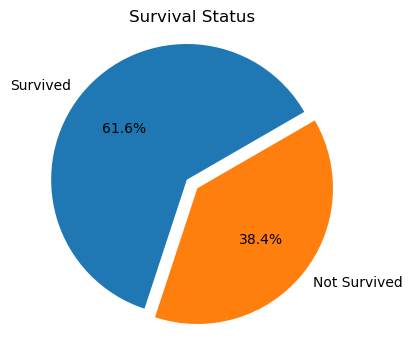

In [36]:
survived = df['Survived']

plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(survived.value_counts(), explode=(0.1, 0), labels=['Survived', 'Not Survived'], autopct='%1.1f%%', startangle=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Survival Status')  # Add a title to the plot
plt.show()

### 2.4.2 Passenger's Gender distribution

In [37]:
sex_dist = df["Sex"].value_counts()
print(sex_dist)

Sex
1    577
0    314
Name: count, dtype: int64


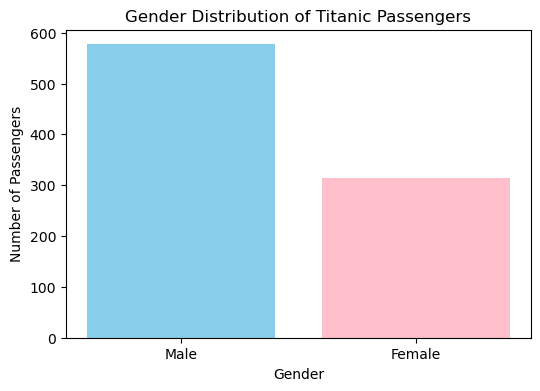

In [38]:
plt.figure(figsize=(6, 4)) # Setting the figure size

plt.bar(x=['Male', 'Female'], height=sex_dist, color=('skyblue', 'pink')) # Create bar chart
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Gender Distribution of Titanic Passengers')
# Show plot
plt.show()

### 2.4.3 SibSp distribution

In [39]:
parch_count = df['Parch'].value_counts().sort_index()
print(parch_count)

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


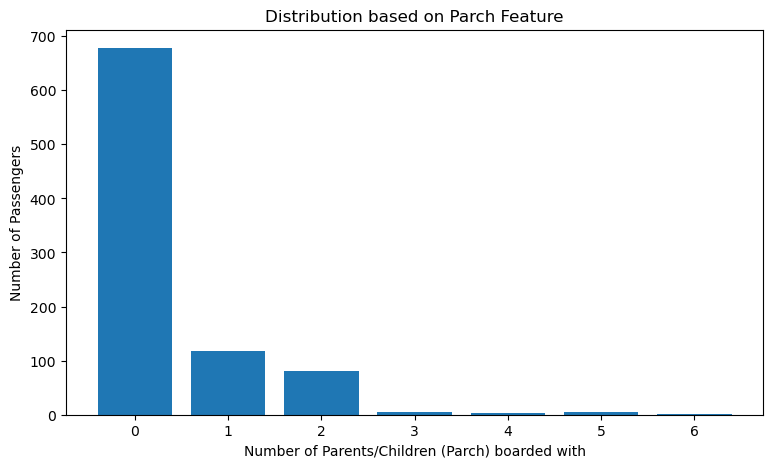

In [40]:
plt.figure(figsize=(9, 5))

# Create bar chart
plt.bar(x=parch_count.index, height=parch_count)

# Add labels and title
plt.xlabel('Number of Parents/Children (Parch) boarded with')
plt.ylabel('Number of Passengers')
plt.title('Distribution based on Parch Feature')

plt.show()

We notice that the majority of the passenger on the voyage boarded the ship with no parent or childrens, while only 1 passenger boarded with 6 relatives(perhaps 4 childrens and 2 parent ).


### 2.4.4 Age distribution 

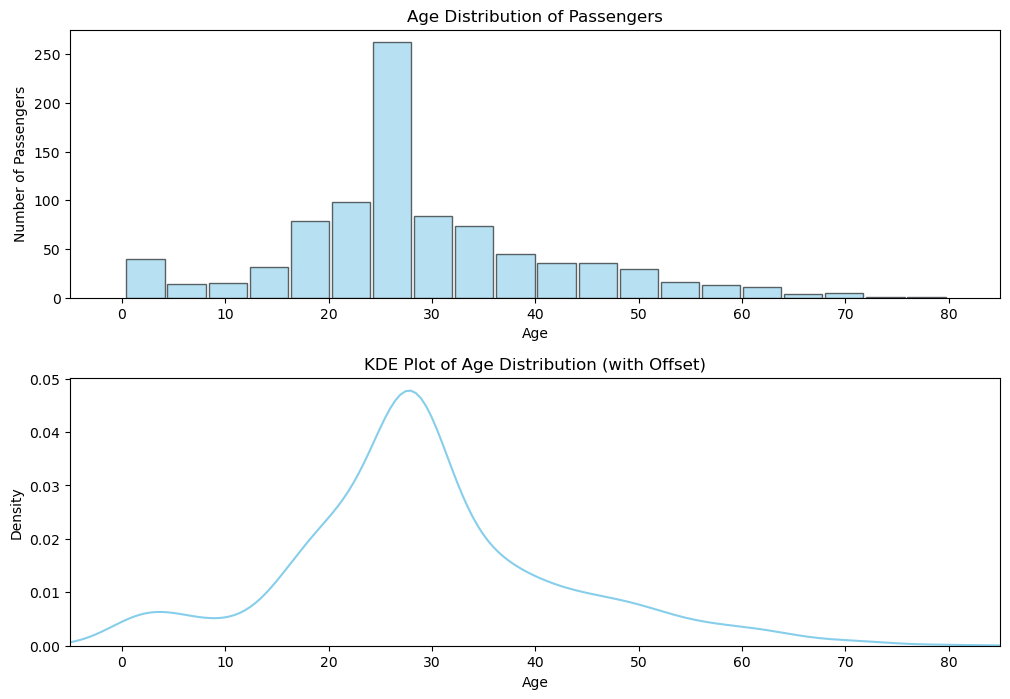

In [41]:
plt.figure(figsize=(12, 8))  

plt.subplots_adjust(hspace=0.3) 

# Create subplot 1 for the histogram
plt.subplot(211)

# Create a histogram of the age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.6, width=3.7, histtype='barstacked')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')

# x-axis offset for the histogram
plt.xlim(-5, 85)

# Create subplot 2 for the density plot
plt.subplot(212)

# Create a density distribution based on KDE
sns.kdeplot(df.fillna({'Age': df['Age'].mean()}, inplace=False)['Age'], color='skyblue')

# x-axis offset for the density plot
plt.xlim(-5, 85)  

# Customize labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age Distribution (with Offset)')

plt.show()

### 2.4.5 Pclass distrbitution

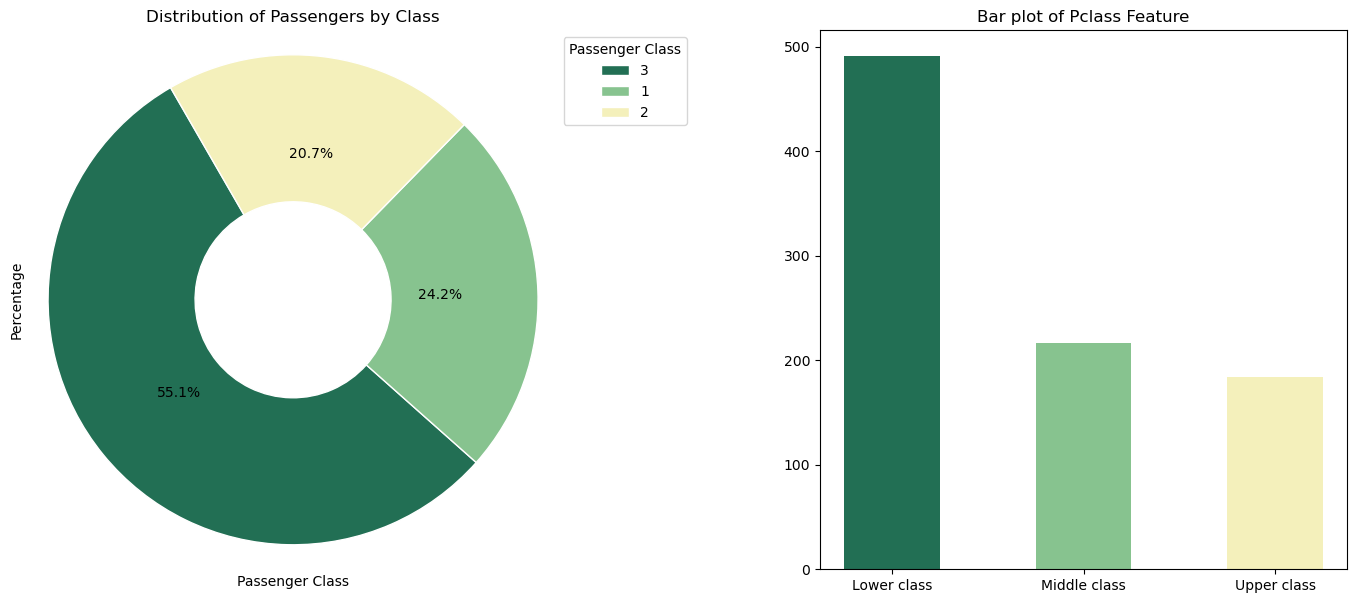

In [42]:
# Calculate the value counts for 'Pclass'
pclass = df['Pclass'].value_counts()

colors = ['#226F54', '#87C38F', '#F4F0BB']

plt.figure(figsize=(17, 7))  

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.1) 
plt.subplots_adjust(wspace=0.5) 

# Pie chart subplot
plt.subplot(121)
pclass.plot(kind='pie', autopct="%.1f%%", startangle=120, labels=None, colors=colors, wedgeprops=dict(width=0.6, edgecolor='w'))

# Add legend and labels outside the pie chart for clarity
plt.legend(pclass.index, loc='upper left', title='Passenger Class', bbox_to_anchor=(1, 1))
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')

# Set title with centered alignment
plt.title('Distribution of Passengers by Class')

# Ensure equal aspect ratio for a circular pie chart
plt.axis('equal')

# Bar plot subplot
plt.subplot(122)
plt.bar(['Lower class','Middle class','Upper class'], pclass, width=0.5, color=colors)
plt.title('Bar plot of Pclass Feature')

plt.show()

### 2.4.6 Embarked Distribution

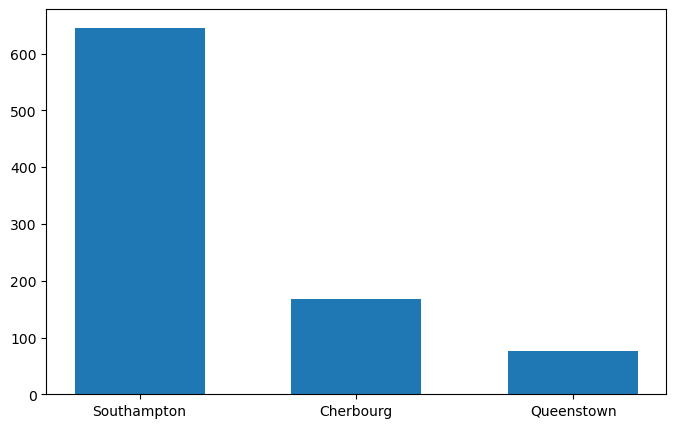

In [43]:
plt.figure(figsize = (8,5) )

plt.subplots_adjust(hspace = 0.3 )
plt.subplots_adjust(wspace = 0.5 )

plt.bar(['Southampton','Cherbourg','Queenstown'], df['Embarked'].value_counts(), width = 0.6)

plt.show()

### 2.4.6 Survival Devided by Age:

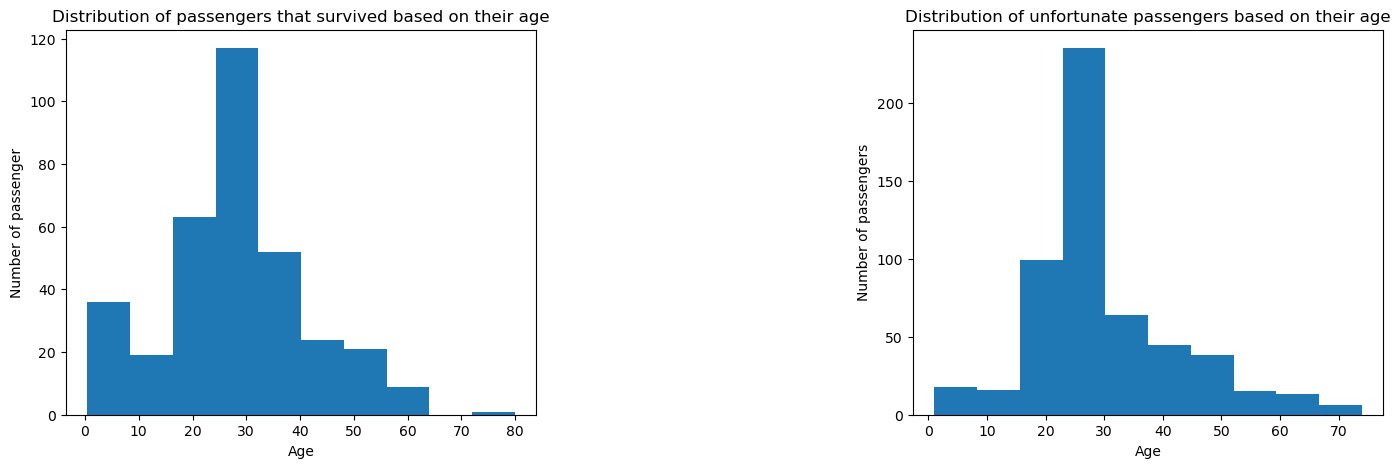

In [44]:
plt.figure(figsize = (17,5) )

surv_yes = df[df['Survived'] == 1]

surv_non = df[df['Survived'] == 0]

plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.8) 

plt.subplot(121)
plt.hist(surv_yes['Age'])
plt.xlabel('Age')
plt.ylabel('Number of passenger')
plt.title('Distribution of passengers that survived based on their age')

plt.subplot(122)
plt.hist(surv_non['Age'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Distribution of unfortunate passengers based on their age')

plt.show()


### 2.4.7 Correlation matrix :

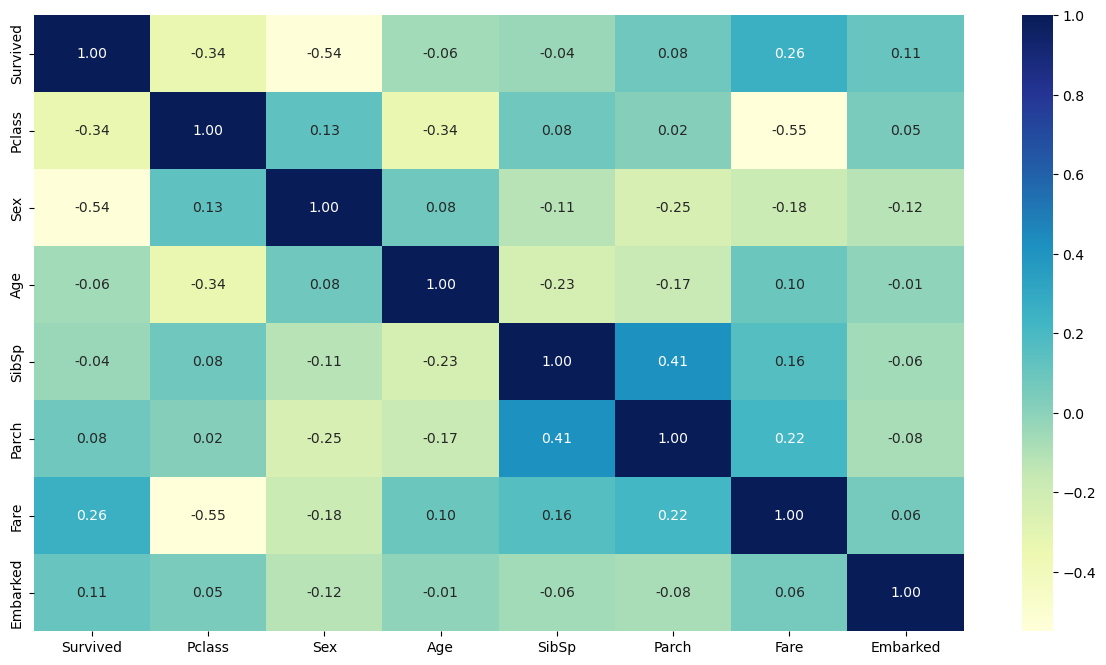

In [51]:
plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

### 2.4.8 Relationship between Features

/home/imad/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_76942/789134689.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


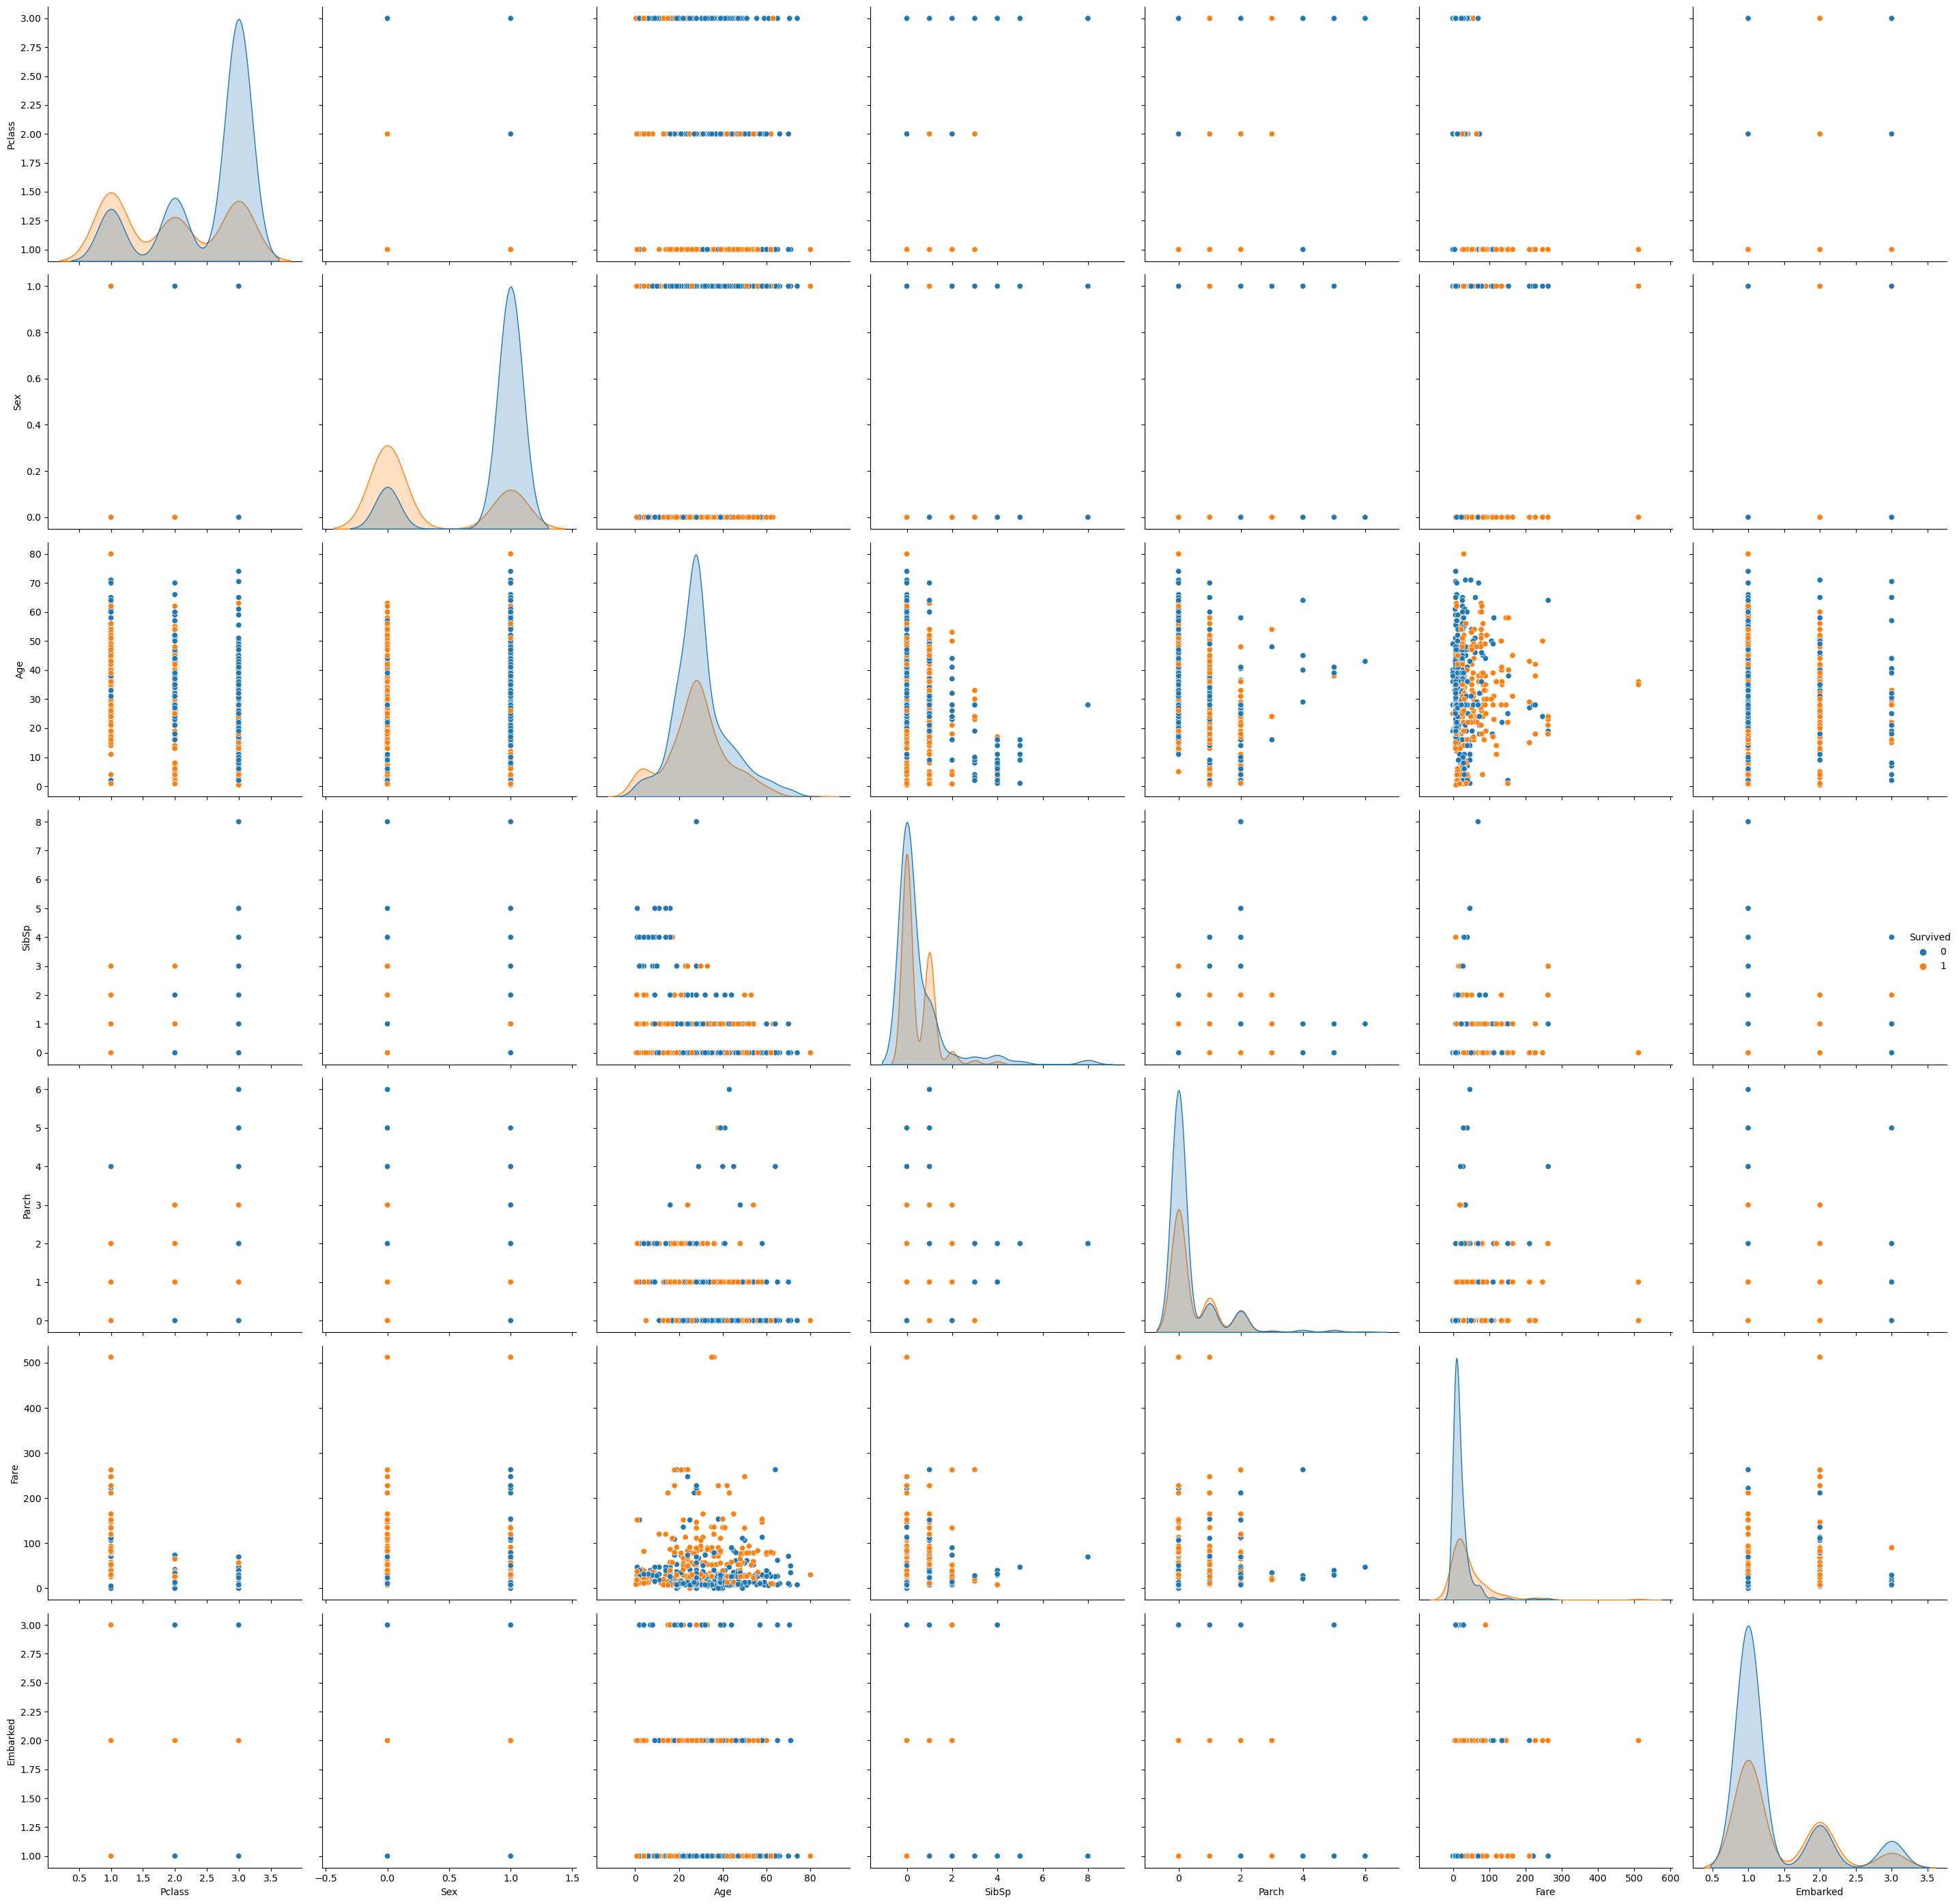

In [46]:
relationship_matrix=sns.pairplot(df, hue='Survived', height=4)

plt.tight_layout()
plt.show()

# Modele preparation

## Splitting data

One of the most essential steps into building a prediction model is to divide the data set into two : 
 - **Test set**  : A data set that we'll survive as a test environement.
 - **Training set** : A data set that contain labeled data and expected outcome.
